In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import fixed_quad, quadrature, quad

import sys

sys.path.append("../Codes/")
from Hall1997_symm import *
from Hall1997 import *
from models import *

#### Test 1: symmetric case
#### take the maximum considered time $T$ to be the collapsing time, plot the two FPTD


In [2]:
# %%script echo skipping

mu = 1
sigma = 1
a = 1.5
theta = 0.3
T = a / theta

In [3]:
# %%script echo skipping

model = AngleModel(mu=mu, sigma=sigma)
num_sims = 10000
upper_time, lower_time, vertical_x = model.simulate_FPTD(init_cond=(0,0), T=T, a=a, theta=theta, dt=0.001, num=num_sims)

In [4]:
# %%script echo skipping

len(upper_time)/num_sims, len(lower_time)/num_sims, len(vertical_x)/num_sims

(0.9157, 0.0843, 0.0)

In [5]:
# %%script echo skipping

probu1_list = []
probu2_list = []
probu3_list = []
ts = np.linspace(0.01, T-0.01, 100)
for t in ts:
    probu1 = density_horiz_symm(t, mu=mu, a=a, b=theta, trunc_num=100, bdy="upper")
    probu2 = density_upper(t, mu=mu, a=a, b=theta, x0=0, trunc_num=100)
    probu3 = density_upper_logsumexp(t, mu=mu, a=a, b=theta, x0=0, trunc_num=100)
    probu1_list.append(probu1)
    probu2_list.append(probu2)
    probu3_list.append(probu3)

probl1_list = []
probl2_list = []
probl3_list = []
for t in ts:
    probl1 = density_horiz_symm(t, mu=mu, a=a, b=theta, trunc_num=100, bdy="lower")
    probl2 = density_lower(t, mu=mu, a=a, b=theta, x0=0, trunc_num=100)
    probl3 = density_lower_logsumexp(t, mu=mu, a=a, b=theta, x0=0, trunc_num=100)
    probl1_list.append(probl1)
    probl2_list.append(probl2)
    probl3_list.append(probl3)
    
counts_u, bins_u = np.histogram(upper_time, bins=40)
dt_u = bins_u[1] - bins_u[0]

counts_l, bins_l = np.histogram(lower_time, bins=40)
dt_l = bins_l[1] - bins_l[0]


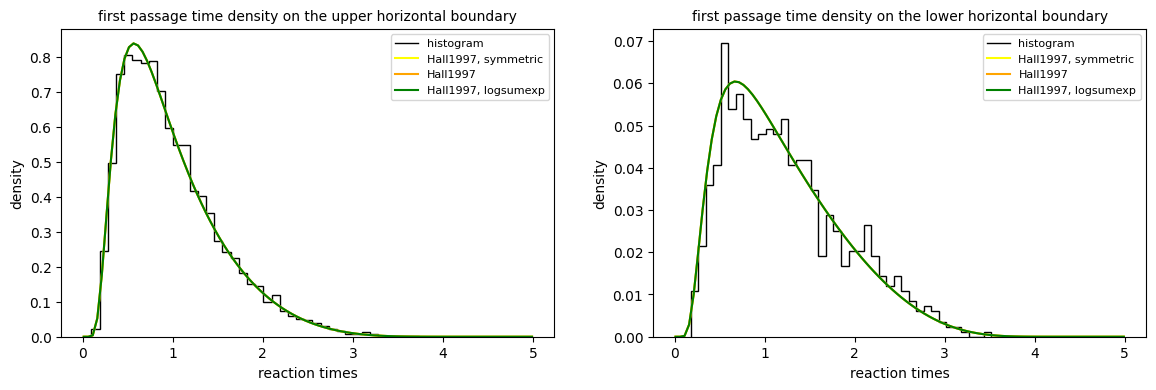

In [6]:
# %%script echo skipping

fig, ax = plt.subplots(1, 2, figsize=(14, 4), dpi=100)
ax[0].stairs(counts_u / num_sims / dt_u, bins_u, color="black", label="histogram")
ax[0].plot(ts, probu1_list, label="Hall1997, symmetric", color="yellow")
ax[0].plot(ts, probu2_list, label="Hall1997", color="orange")
ax[0].plot(ts, probu3_list, label="Hall1997, logsumexp", color="green")
ax[0].legend(fontsize=8)
ax[0].set_title("first passage time density on the upper horizontal boundary", fontsize=10)
ax[0].set_xlabel("reaction times")
ax[0].set_ylabel("density")

ax[1].stairs(counts_l / num_sims / dt_l, bins_l, color="black", label="histogram")
ax[1].plot(ts, probl1_list, label="Hall1997, symmetric", color="yellow")
ax[1].plot(ts, probl2_list, label="Hall1997", color="orange")
ax[1].plot(ts, probl3_list, label="Hall1997, logsumexp", color="green")
ax[1].legend(fontsize=8)
ax[1].set_title(
    "first passage time density on the lower horizontal boundary", fontsize=10
)
ax[1].set_xlabel("reaction times")
ax[1].set_ylabel("density")

plt.show()

#### Test 2: symmetric case
#### take a small $T$, plot the three FPTD

In [7]:
mu = 1
sigma = 1
a = 1.5
theta = 0.3
T = 1

In [8]:
model = AngleModel(mu=mu, sigma=sigma)
num_sims = 20000
upper_time, lower_time, vertical_x = model.simulate_FPTD(init_cond=(0,0), T=T, a=a, theta=theta, dt=0.001, num=num_sims)

In [9]:
len(upper_time) / num_sims, len(lower_time) / num_sims, len(vertical_x) / num_sims

(0.5392, 0.0395, 0.4213)

In [10]:
probu1_list = []
probu2_list = []
probu3_list = []
ts = np.linspace(0.01, T - 0.01, 100)
for t in ts:
    probu1 = density_horiz_symm(t, mu=mu, a=a, b=theta, trunc_num=100, bdy="upper")
    probu2 = density_upper(t, mu=mu, a=a, b=theta, x0=0, trunc_num=100)
    probu3 = density_upper_logsumexp(t, mu=mu, a=a, b=theta, x0=0, trunc_num=100)
    probu1_list.append(probu1)
    probu2_list.append(probu2)
    probu3_list.append(probu3)
    
probl1_list = []
probl2_list = []
probl3_list = []
for t in ts:
    probl1 = density_horiz_symm(t, mu=mu, a=a, b=theta, trunc_num=100, bdy="lower")
    probl2 = density_lower(t, mu=mu, a=a, b=theta, x0=0, trunc_num=100)
    probl3 = density_lower_logsumexp(t, mu=mu, a=a, b=theta, x0=0, trunc_num=100)
    probl1_list.append(probl1)
    probl2_list.append(probl2)
    probl3_list.append(probl3)
    
probv1_list = []
probv2_list = []
probv3_list = []
xs = np.linspace(-a + theta * T, a - theta * T, 100)
for x in xs:
    probv1 = density_vertical_symm(x, mu=mu, a=a, b=theta, t0=T, trunc_num=100)
    probv2 = density_vertical(x, mu=mu, a=a, b=theta, x0=0, T=T, trunc_num=100)
    probv3 = density_vertical_logsumexp(x, mu=mu, a=a, b=theta, x0=0, T=T, trunc_num=100)
    probv1_list.append(probv1)
    probv2_list.append(probv2)
    probv3_list.append(probv3)

counts_u, bins_u = np.histogram(upper_time, bins=40)
dt_u = bins_u[1] - bins_u[0]


counts_l, bins_l = np.histogram(lower_time, bins=40)
dt_l = bins_l[1] - bins_l[0]

counts_v, bins_v = np.histogram(vertical_x, bins=40)
dx_v = bins_v[1] - bins_v[0]


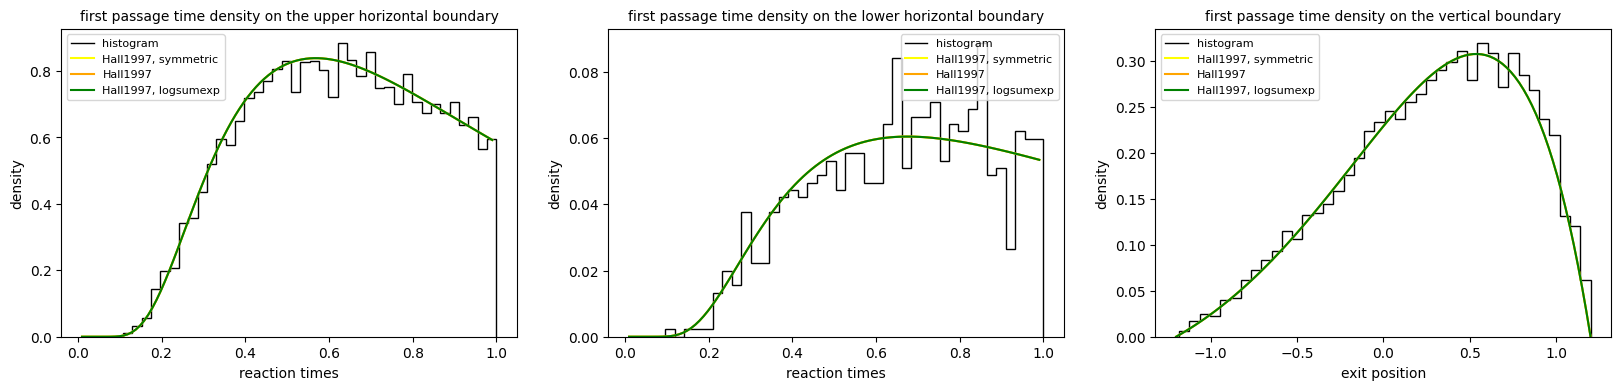

In [11]:

fig, ax = plt.subplots(1, 3, figsize=(20, 4), dpi=100)
ax[0].stairs(counts_u/num_sims/dt_u, bins_u, color="black", label="histogram")
ax[0].plot(ts, probu1_list, label="Hall1997, symmetric", color="yellow")
ax[0].plot(ts, probu2_list, label="Hall1997", color="orange")
ax[0].plot(ts, probu3_list, label="Hall1997, logsumexp", color="green")
ax[0].legend(fontsize=8)
ax[0].set_title("first passage time density on the upper horizontal boundary", fontsize=10)
ax[0].set_xlabel("reaction times")
ax[0].set_ylabel("density")

ax[1].stairs(counts_l/num_sims/dt_l, bins_l, color="black", label="histogram")
ax[1].plot(ts, probl1_list, label="Hall1997, symmetric", color="yellow")
ax[1].plot(ts, probl2_list, label="Hall1997", color="orange")
ax[1].plot(ts, probl3_list, label="Hall1997, logsumexp", color="green")
ax[1].legend(fontsize=8)
ax[1].set_title("first passage time density on the lower horizontal boundary", fontsize=10)
ax[1].set_xlabel("reaction times")
ax[1].set_ylabel("density")

ax[2].stairs(counts_v/num_sims/dx_v, bins_v, color="black", label="histogram")
ax[2].plot(xs, probv1_list, label="Hall1997, symmetric", color="yellow")
ax[2].plot(xs, probv2_list, label="Hall1997", color="orange")
ax[2].plot(xs, probv3_list, label="Hall1997, logsumexp", color="green")
ax[2].legend(fontsize=8)
ax[2].set_title("first passage time density on the vertical boundary", fontsize=10)
ax[2].set_xlabel("exit position")
ax[2].set_ylabel("density")

plt.show()

In [12]:
density_upper_eval = lambda t: density_horiz_symm(t, mu=mu, a=a, b=theta, trunc_num=50, bdy="upper")
density_lower_eval = lambda t: density_horiz_symm(t, mu=mu, a=a, b=theta, trunc_num=50, bdy="lower")
density_verti_eval = lambda x: density_vertical_symm(x, mu=mu, a=a, b=theta, t0=T, trunc_num=35)

In [13]:
Pu, _ = fixed_quad(density_upper_eval, 0, T, n=10)
Pl, _ = fixed_quad(density_lower_eval, 0, T, n=10)
Pv, _ = fixed_quad(density_verti_eval, -a + theta * T, a - theta * T, n=10)
Pu, Pl, Pv, Pu + Pl + Pv

(0.5467664851268483,
 0.039831357569581956,
 0.413328097014037,
 0.9999259397104674)

In [14]:
Pu, _ = quadrature(density_upper_eval, 0, T)
Pl, _ = quadrature(density_lower_eval, 0, T)
Pv, _ = quadrature(density_verti_eval, -a + theta * T, a - theta * T)
Pu, Pl, Pv, Pu + Pl + Pv

(0.5468368353855536,
 0.03983503297704253,
 0.4133280969973517,
 0.9999999653599478)

#### Test 3: asymmetric case
#### take a small $T$, plot the three FPTD

In [15]:
mu = 1
sigma = 1
a = 1.5
theta = 0.3
x0 = -0.3
T = 2

In [16]:
model = AngleModel(mu=mu, sigma=sigma)
num_sims = 20000
upper_time, lower_time, vertical_x = model.simulate_FPTD(init_cond=(0,x0), T=T, a=a, theta=theta, dt=0.001, num=num_sims)

In [17]:
len(upper_time)/num_sims, len(lower_time)/num_sims, len(vertical_x)/num_sims

(0.7799, 0.1321, 0.088)

In [18]:
probu2_list = []
probu3_list = []
ts = np.linspace(0.01, T - 0.01, 100)
for t in ts:
    probu2 = density_upper(t, mu=mu, a=a, b=theta, x0=x0, trunc_num=100)
    probu3 = density_upper_logsumexp(t, mu=mu, a=a, b=theta, x0=x0, trunc_num=100)
    probu2_list.append(probu2)
    probu3_list.append(probu3)
    
probl2_list = []
probl3_list = []
for t in ts:
    probl2 = density_lower(t, mu=mu, a=a, b=theta, x0=x0, trunc_num=100)
    probl3 = density_lower_logsumexp(t, mu=mu, a=a, b=theta, x0=x0, trunc_num=100)
    probl2_list.append(probl2)
    probl3_list.append(probl3)
    
probv2_list = []
probv3_list = []
xs = np.linspace(-a + theta * T, a - theta * T, 100)
for x in xs:
    probv2 = density_vertical(x, mu=mu, a=a, b=theta, x0=x0, T=T, trunc_num=100)
    probv3 = density_vertical_logsumexp(x, mu=mu, a=a, b=theta, x0=x0, T=T, trunc_num=100)
    probv2_list.append(probv2)
    probv3_list.append(probv3)

counts_u, bins_u = np.histogram(upper_time, bins=40)
dt_u = bins_u[1] - bins_u[0]


counts_l, bins_l = np.histogram(lower_time, bins=40)
dt_l = bins_l[1] - bins_l[0]

counts_v, bins_v = np.histogram(vertical_x, bins=40)
dx_v = bins_v[1] - bins_v[0]

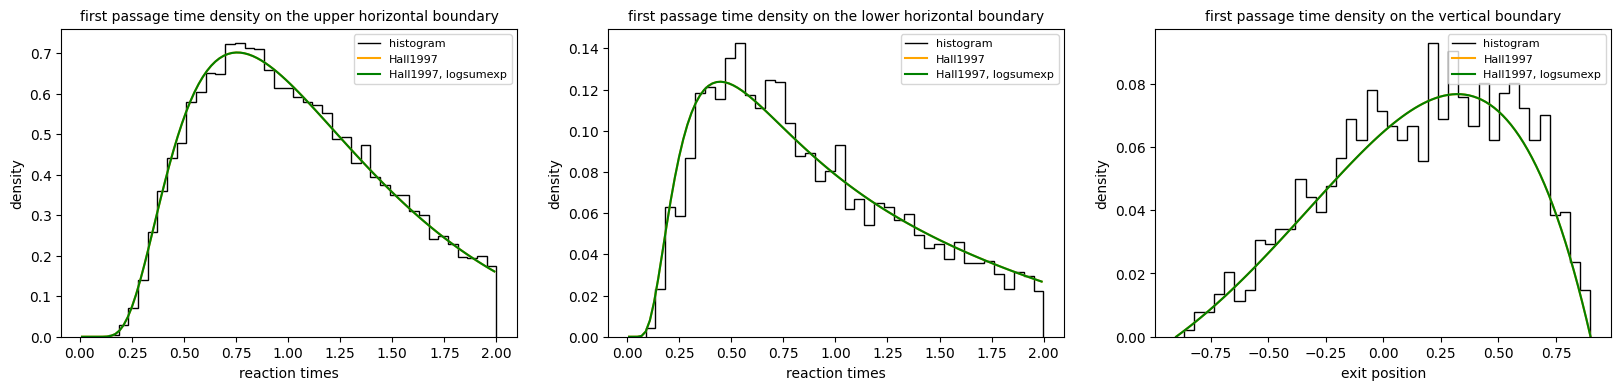

In [19]:

fig, ax = plt.subplots(1, 3, figsize=(20, 4), dpi=100)
ax[0].stairs(counts_u/num_sims/dt_u, bins_u, color="black", label="histogram")
ax[0].plot(ts, probu2_list, label="Hall1997", color="orange")
ax[0].plot(ts, probu3_list, label="Hall1997, logsumexp", color="green")
ax[0].legend(fontsize=8)
ax[0].set_title("first passage time density on the upper horizontal boundary", fontsize=10)
ax[0].set_xlabel("reaction times")
ax[0].set_ylabel("density")

ax[1].stairs(counts_l/num_sims/dt_l, bins_l, color="black", label="histogram")
ax[1].plot(ts, probl2_list, label="Hall1997", color="orange")
ax[1].plot(ts, probl3_list, label="Hall1997, logsumexp", color="green")
ax[1].legend(fontsize=8)
ax[1].set_title("first passage time density on the lower horizontal boundary", fontsize=10)
ax[1].set_xlabel("reaction times")
ax[1].set_ylabel("density")

ax[2].stairs(counts_v/num_sims/dx_v, bins_v, color="black", label="histogram")
ax[2].plot(xs, probv2_list, label="Hall1997", color="orange")
ax[2].plot(xs, probv3_list, label="Hall1997, logsumexp", color="green")
ax[2].legend(fontsize=8)
ax[2].set_title("first passage time density on the vertical boundary", fontsize=10)
ax[2].set_xlabel("exit position")
ax[2].set_ylabel("density")

plt.show()

In [20]:
density_upper_eval = lambda t: density_upper(t, mu=mu, a=a, b=theta, x0=x0, trunc_num=50)
density_lower_eval = lambda t: density_lower(t, mu=mu, a=a, b=theta, x0=x0, trunc_num=50)
density_verti_eval = lambda x: density_vertical(x, mu=mu, a=a, b=theta, x0=x0, T=T, trunc_num=35)
Pu, _ = fixed_quad(density_upper_eval, 0, T, n=10)
Pl, _ = fixed_quad(density_lower_eval, 0, T, n=10)
Pv, _ = fixed_quad(density_verti_eval, -a + theta * T, a - theta * T, n=10)
Pu, Pl, Pv, Pu + Pl + Pv

(0.7829536374052865,
 0.13475134803736344,
 0.08227624770326893,
 0.9999812331459188)